# ECE695 DL HW5: Object Detection
Author: Rahul Deshmukh

email: deshmuk5@purdue.edu

Sources:
1. https://engineering.purdue.edu/kak/distDLS/DLStudio-1.1.0.html#DLStudio

What is new in my code:
1. New model for classification: using bottleneck skip layer
2. IOU loss function
3. Ensemble network for testing



In [0]:
import random
import numpy as np
import torch
import os, sys

from google.colab import drive
drive.mount('/content/gdrive')

seed = 0           
random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmarks=False
os.environ['PYTHONHASHSEED'] = str(seed)

Mounted at /content/gdrive


### (0) Install DLStudio 1.1.0


In [0]:
dls_path = './gdrive/My Drive/ECE695_DL/HW5/DLStudio-1.1.0/'
data_base_path = './gdrive/My Drive/ECE695_DL/HW5/data/'
%cd ./gdrive/My\ Drive/ECE695_DL/HW5/DLStudio-1.1.0/
!sudo python3 setup.py install

/content/gdrive/My Drive/ECE695_DL/HW5/DLStudio-1.1.0
running install
running bdist_egg
running egg_info
writing DLStudio.egg-info/PKG-INFO
writing dependency_links to DLStudio.egg-info/dependency_links.txt
writing top-level names to DLStudio.egg-info/top_level.txt
reading manifest file 'DLStudio.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'DLStudio.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying DLStudio/DLStudio.py -> build/lib/DLStudio
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/DLStudio
copying build/lib/DLStudio/__init__.py -> build/bdist.linux-x86_64/egg/DLStudio
copying build/lib/DLStudio/DLStudio.py -> build/bdist.linux-x86_64/egg/DLStudio
copying build/lib/DLStudio/DLStudio_original.py -> build/bdist.linux-x86_64/egg/DLStudio
byte-compiling build/bdist.linux-x86_64/egg/DLStudio/__init__.py to __init__.cpython-36.pyc
byte-compiling b

### (1) Testing out DLStudio

#### (1.1) Detection using clean images

In [0]:
%matplotlib inline
%run ./Examples/object_detection_and_localization.py PurdueShapes5-10000-train-noise-00.gz PurdueShapes5-1000-test-noise-00.gz

ERROR:root:File `'./Examples/object_detection_and_localization.py'` not found.


#### (1.2) Detection using noisy images

##### (1.2.1) 20% noise


Loading training data from the torch-saved archive



printing out the model:
LOADnet2(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (skip64): SkipBlock(
    (convo): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (skip64ds): SkipBlock(
    (convo): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsampler): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2))
  )
  (skip64to128): SkipBlock(
    (convo): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (skip128): SkipBlock(
    (convo): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 

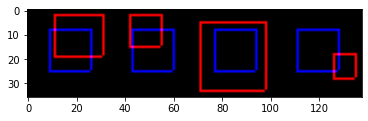



[epoch=1 iter=1000:] Ground Truth:           oval       oval       oval  rectangle
[epoch=1 iter=1000:] Predicted Labels:       oval       oval       oval       oval
                    gt_bb:  [24,18,31,26]
                  pred_bb:  [7,6,23,21]
                    gt_bb:  [15,0,19,15]
                  pred_bb:  [7,6,23,21]
                    gt_bb:  [16,0,26,18]
                  pred_bb:  [7,6,23,21]
                    gt_bb:  [10,7,27,17]
                  pred_bb:  [7,6,23,21]

[epoch:1, iteration: 1000]  loss_labeling: 0.732  loss_regression: 34.821  


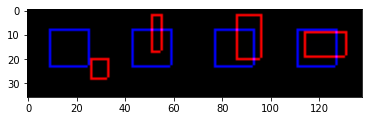



[epoch=1 iter=1500:] Ground Truth:           oval       oval       disk       star
[epoch=1 iter=1500:] Predicted Labels:       oval       oval       disk       star
                    gt_bb:  [8,6,20,10]
                  pred_bb:  [8,5,26,23]
                    gt_bb:  [15,12,31,16]
                  pred_bb:  [8,5,26,23]
                    gt_bb:  [1,12,15,26]
                  pred_bb:  [8,5,26,23]
                    gt_bb:  [0,1,10,10]
                  pred_bb:  [8,5,26,23]

[epoch:1, iteration: 1500]  loss_labeling: 0.509  loss_regression: 35.329  


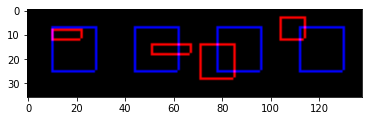



[epoch=1 iter=2000:] Ground Truth:      rectangle       star   triangle       disk
[epoch=1 iter=2000:] Predicted Labels:       oval       star   triangle       disk
                    gt_bb:  [15,7,31,23]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [3,0,14,10]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [7,6,29,31]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [7,4,25,22]
                  pred_bb:  [8,6,24,22]

[epoch:1, iteration: 2000]  loss_labeling: 0.418  loss_regression: 34.870  


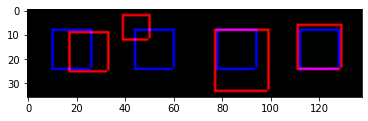



[epoch=1 iter=2500:] Ground Truth:       triangle   triangle   triangle       disk
[epoch=1 iter=2500:] Predicted Labels:   triangle   triangle   triangle       disk
                    gt_bb:  [0,8,24,30]
                  pred_bb:  [7,6,22,21]
                    gt_bb:  [6,3,26,28]
                  pred_bb:  [7,6,22,21]
                    gt_bb:  [2,4,28,29]
                  pred_bb:  [7,6,22,21]
                    gt_bb:  [13,2,27,16]
                  pred_bb:  [7,6,22,21]

[epoch:1, iteration: 2500]  loss_labeling: 0.349  loss_regression: 36.132  


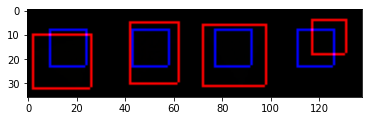



[epoch=2 iter=500:] Ground Truth:       triangle  rectangle   triangle       oval
[epoch=2 iter=500:] Predicted Labels:   triangle  rectangle   triangle       oval
                    gt_bb:  [6,4,30,27]
                  pred_bb:  [9,6,26,22]
                    gt_bb:  [15,4,23,19]
                  pred_bb:  [9,6,26,22]
                    gt_bb:  [3,0,26,23]
                  pred_bb:  [9,6,26,22]
                    gt_bb:  [19,14,31,24]
                  pred_bb:  [9,6,26,22]

[epoch:2, iteration:  500]  loss_labeling: 0.314  loss_regression: 34.491  


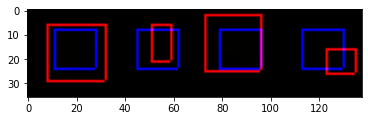



[epoch=2 iter=1000:] Ground Truth:           star  rectangle       oval  rectangle
[epoch=2 iter=1000:] Predicted Labels:       star  rectangle       oval       oval
                    gt_bb:  [5,0,17,10]
                  pred_bb:  [7,5,21,19]
                    gt_bb:  [5,0,29,23]
                  pred_bb:  [7,5,21,19]
                    gt_bb:  [13,5,25,19]
                  pred_bb:  [7,5,21,19]
                    gt_bb:  [19,15,30,23]
                  pred_bb:  [7,5,21,19]

[epoch:2, iteration: 1000]  loss_labeling: 0.317  loss_regression: 35.218  


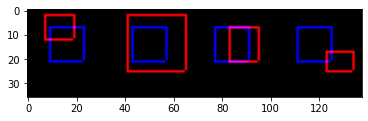



[epoch=2 iter=1500:] Ground Truth:           oval       disk   triangle   triangle
[epoch=2 iter=1500:] Predicted Labels:       oval       disk   triangle   triangle
                    gt_bb:  [13,7,27,19]
                  pred_bb:  [10,7,28,25]
                    gt_bb:  [9,5,31,27]
                  pred_bb:  [10,8,30,27]
                    gt_bb:  [0,1,25,31]
                  pred_bb:  [7,5,21,20]
                    gt_bb:  [8,4,31,28]
                  pred_bb:  [11,8,31,29]

[epoch:2, iteration: 1500]  loss_labeling: 0.287  loss_regression: 33.725  


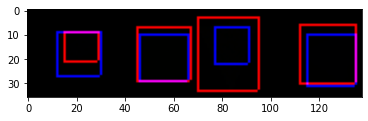



[epoch=2 iter=2000:] Ground Truth:           disk   triangle       star   triangle
[epoch=2 iter=2000:] Predicted Labels:       disk   triangle       star   triangle
                    gt_bb:  [14,8,31,26]
                  pred_bb:  [8,5,23,19]
                    gt_bb:  [1,3,23,27]
                  pred_bb:  [8,5,23,19]
                    gt_bb:  [4,0,20,14]
                  pred_bb:  [8,5,23,19]
                    gt_bb:  [1,3,24,27]
                  pred_bb:  [8,5,23,19]

[epoch:2, iteration: 2000]  loss_labeling: 0.360  loss_regression: 32.042  


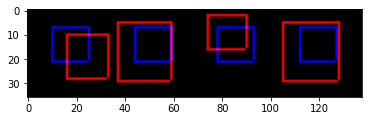



[epoch=2 iter=2500:] Ground Truth:       triangle       disk  rectangle  rectangle
[epoch=2 iter=2500:] Predicted Labels:   triangle       disk  rectangle  rectangle
                    gt_bb:  [7,6,31,30]
                  pred_bb:  [11,8,31,30]
                    gt_bb:  [10,9,22,21]
                  pred_bb:  [9,6,25,23]
                    gt_bb:  [15,0,18,17]
                  pred_bb:  [7,5,22,19]
                    gt_bb:  [13,8,28,23]
                  pred_bb:  [10,7,29,27]

[epoch:2, iteration: 2500]  loss_labeling: 0.265  loss_regression: 26.272  


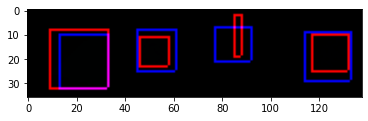


Finished Training



[i=0:] Ground Truth:      rectangle   triangle       disk       oval
[i=0:] Predicted Labels:       oval   triangle       disk  rectangle
                    gt_bb:  [11,4,26,17]
                  pred_bb:  [7,5,22,20]
                    gt_bb:  [2,0,23,29]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [19,6,29,16]
                  pred_bb:  [9,6,25,23]
                    gt_bb:  [9,4,27,18]
                  pred_bb:  [7,5,22,20]


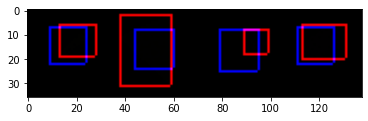



[i=50:] Ground Truth:      rectangle   triangle       disk       oval
[i=50:] Predicted Labels:  rectangle   triangle       disk  rectangle
                    gt_bb:  [7,0,31,30]
                  pred_bb:  [10,7,30,27]
                    gt_bb:  [0,1,27,30]
                  pred_bb:  [7,5,22,20]
                    gt_bb:  [22,18,31,28]
                  pred_bb:  [9,7,28,25]
                    gt_bb:  [12,0,13,12]
                  pred_bb:  [6,4,17,15]


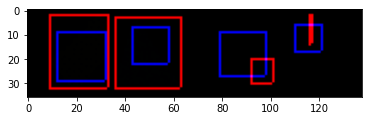



[i=100:] Ground Truth:      rectangle   triangle       disk       oval
[i=100:] Predicted Labels:  rectangle   triangle       disk  rectangle
                    gt_bb:  [17,12,31,25]
                  pred_bb:  [10,7,30,27]
                    gt_bb:  [2,1,22,30]
                  pred_bb:  [7,5,21,19]
                    gt_bb:  [17,9,31,23]
                  pred_bb:  [10,7,29,26]
                    gt_bb:  [14,2,15,14]
                  pred_bb:  [6,4,18,16]


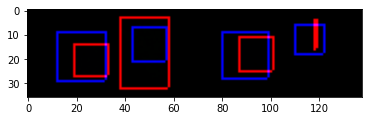



[i=150:] Ground Truth:      rectangle   triangle       disk       oval
[i=150:] Predicted Labels:  rectangle   triangle       disk  rectangle
                    gt_bb:  [13,7,31,18]
                  pred_bb:  [9,6,26,23]
                    gt_bb:  [0,2,28,24]
                  pred_bb:  [6,4,19,17]
                    gt_bb:  [15,4,27,16]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [10,4,23,14]
                  pred_bb:  [6,4,19,17]


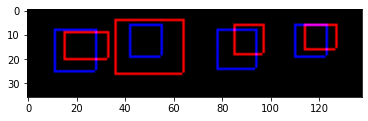



[i=200:] Ground Truth:      rectangle   triangle       disk       oval
[i=200:] Predicted Labels:  rectangle   triangle       disk  rectangle
                    gt_bb:  [1,0,9,7]
                  pred_bb:  [6,4,18,16]
                    gt_bb:  [0,5,28,29]
                  pred_bb:  [9,6,26,23]
                    gt_bb:  [10,9,22,21]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [9,6,31,24]
                  pred_bb:  [9,7,27,25]


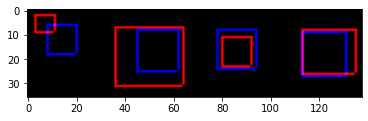



Prediction accuracy for rectangle : 87 %
Prediction accuracy for triangle : 99 %
Prediction accuracy for  disk : 98 %
Prediction accuracy for  oval : 56 %
Prediction accuracy for  star : 99 %



Overall accuracy of the network on the 1000 test images: 87 %


Displaying the confusion matrix:

                      rectangle       triangle           disk           oval           star

   rectangle:            87.00           0.00           2.00           7.00           4.00
    triangle:             0.50          99.00           0.00           0.00           0.50
        disk:             0.00           0.00          98.50           0.50           1.00
        oval:            41.00           0.00           2.50          56.00           0.50
        star:             1.00           0.00           0.00           0.00          99.00


In [0]:
%run -i ./Examples/noisy_object_detection_and_localization.py PurdueShapes5-10000-train-noise-20.gz PurdueShapes5-1000-test-noise-20.gz 1e-4 2

##### (1.2.2) 50% noise


Loading training data from the torch-saved archive



printing out the model:
LOADnet2(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (skip64): SkipBlock(
    (convo): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (skip64ds): SkipBlock(
    (convo): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsampler): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2))
  )
  (skip64to128): SkipBlock(
    (convo): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (skip128): SkipBlock(
    (convo): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 

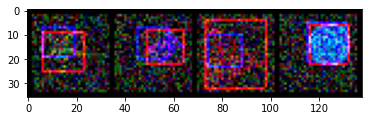



[epoch=1 iter=1000:] Ground Truth:           oval       oval       oval  rectangle
[epoch=1 iter=1000:] Predicted Labels:       oval       oval  rectangle       oval
                    gt_bb:  [13,11,30,19]
                  pred_bb:  [8,5,23,19]
                    gt_bb:  [20,12,26,21]
                  pred_bb:  [10,7,22,19]
                    gt_bb:  [13,0,19,17]
                  pred_bb:  [6,3,18,17]
                    gt_bb:  [16,7,30,21]
                  pred_bb:  [11,5,27,20]

[epoch:1, iteration: 1000]  loss_labeling: 1.478  loss_regression: 15.629  


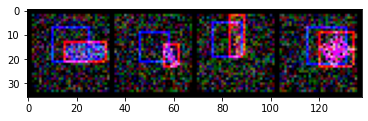



[epoch=1 iter=1500:] Ground Truth:           oval       oval       disk       star
[epoch=1 iter=1500:] Predicted Labels:  rectangle  rectangle   triangle       star
                    gt_bb:  [14,6,31,15]
                  pred_bb:  [13,3,30,17]
                    gt_bb:  [10,0,24,20]
                  pred_bb:  [8,0,26,18]
                    gt_bb:  [10,14,28,31]
                  pred_bb:  [10,13,27,30]
                    gt_bb:  [9,2,26,18]
                  pred_bb:  [7,1,23,16]

[epoch:1, iteration: 1500]  loss_labeling: 1.396  loss_regression: 13.151  


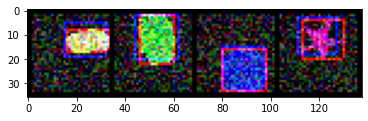



[epoch=1 iter=2000:] Ground Truth:      rectangle       star   triangle       disk
[epoch=1 iter=2000:] Predicted Labels:       star  rectangle   triangle  rectangle
                    gt_bb:  [13,6,20,15]
                  pred_bb:  [12,4,24,18]
                    gt_bb:  [9,5,26,22]
                  pred_bb:  [8,6,24,22]
                    gt_bb:  [5,0,29,27]
                  pred_bb:  [19,7,31,21]
                    gt_bb:  [6,4,26,24]
                  pred_bb:  [8,5,27,24]

[epoch:1, iteration: 2000]  loss_labeling: 1.322  loss_regression: 12.077  


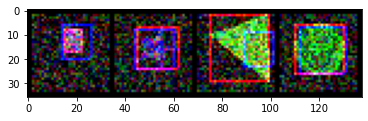



[epoch=1 iter=2500:] Ground Truth:       triangle   triangle   triangle       disk
[epoch=1 iter=2500:] Predicted Labels:   triangle       star       disk       oval
                    gt_bb:  [3,6,23,30]
                  pred_bb:  [4,6,25,28]
                    gt_bb:  [1,5,31,25]
                  pred_bb:  [3,5,22,23]
                    gt_bb:  [3,4,30,31]
                  pred_bb:  [7,6,26,27]
                    gt_bb:  [10,2,31,24]
                  pred_bb:  [12,8,22,19]

[epoch:1, iteration: 2500]  loss_labeling: 1.309  loss_regression: 10.103  


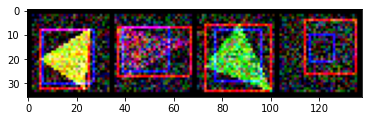



[epoch=2 iter=500:] Ground Truth:       triangle  rectangle   triangle       oval
[epoch=2 iter=500:] Predicted Labels:       disk       oval   triangle   triangle
                    gt_bb:  [2,1,27,24]
                  pred_bb:  [7,5,26,23]
                    gt_bb:  [4,0,8,6]
                  pred_bb:  [8,7,17,14]
                    gt_bb:  [0,1,22,28]
                  pred_bb:  [0,8,18,26]
                    gt_bb:  [20,14,31,24]
                  pred_bb:  [19,15,30,24]

[epoch:2, iteration:  500]  loss_labeling: 1.191  loss_regression: 9.071  


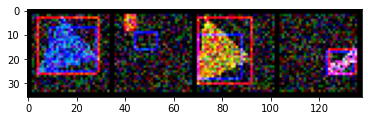



[epoch=2 iter=1000:] Ground Truth:           star  rectangle       oval  rectangle
[epoch=2 iter=1000:] Predicted Labels:  rectangle       oval       oval   triangle
                    gt_bb:  [4,4,19,18]
                  pred_bb:  [2,2,20,19]
                    gt_bb:  [10,3,29,22]
                  pred_bb:  [10,2,28,24]
                    gt_bb:  [17,8,25,20]
                  pred_bb:  [12,6,25,20]
                    gt_bb:  [5,0,31,29]
                  pred_bb:  [5,5,31,31]

[epoch:2, iteration: 1000]  loss_labeling: 1.183  loss_regression: 8.757  


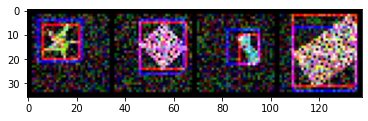



[epoch=2 iter=1500:] Ground Truth:           oval       disk   triangle   triangle
[epoch=2 iter=1500:] Predicted Labels:  rectangle       star       disk   triangle
                    gt_bb:  [19,6,23,20]
                  pred_bb:  [13,6,25,19]
                    gt_bb:  [17,4,29,16]
                  pred_bb:  [10,7,20,17]
                    gt_bb:  [0,6,30,31]
                  pred_bb:  [12,12,27,25]
                    gt_bb:  [1,2,30,27]
                  pred_bb:  [3,4,30,30]

[epoch:2, iteration: 1500]  loss_labeling: 1.149  loss_regression: 8.099  


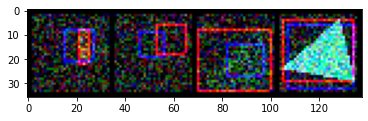



[epoch=2 iter=2000:] Ground Truth:           disk   triangle       star   triangle
[epoch=2 iter=2000:] Predicted Labels:       disk   triangle       oval   triangle
                    gt_bb:  [15,17,25,27]
                  pred_bb:  [12,11,25,26]
                    gt_bb:  [3,1,28,24]
                  pred_bb:  [8,2,31,23]
                    gt_bb:  [8,0,20,9]
                  pred_bb:  [8,0,16,10]
                    gt_bb:  [0,9,20,29]
                  pred_bb:  [0,12,15,31]

[epoch:2, iteration: 2000]  loss_labeling: 1.154  loss_regression: 7.903  


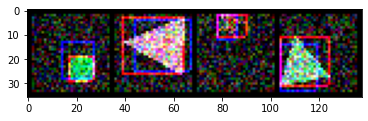



[epoch=2 iter=2500:] Ground Truth:       triangle       disk  rectangle  rectangle
[epoch=2 iter=2500:] Predicted Labels:   triangle  rectangle       oval  rectangle
                    gt_bb:  [2,8,30,29]
                  pred_bb:  [0,9,29,31]
                    gt_bb:  [12,4,28,20]
                  pred_bb:  [9,4,28,22]
                    gt_bb:  [14,0,26,20]
                  pred_bb:  [10,0,25,20]
                    gt_bb:  [8,0,27,19]
                  pred_bb:  [7,0,27,19]

[epoch:2, iteration: 2500]  loss_labeling: 1.112  loss_regression: 6.993  


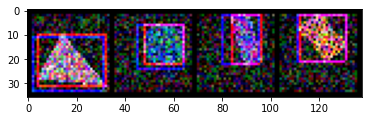


Finished Training



[i=0:] Ground Truth:      rectangle   triangle       disk       oval
[i=0:] Predicted Labels:  rectangle       disk       disk  rectangle
                    gt_bb:  [12,7,18,15]
                  pred_bb:  [8,4,23,18]
                    gt_bb:  [0,1,21,24]
                  pred_bb:  [3,3,23,25]
                    gt_bb:  [8,16,22,30]
                  pred_bb:  [7,16,23,30]
                    gt_bb:  [13,8,24,14]
                  pred_bb:  [10,5,25,17]


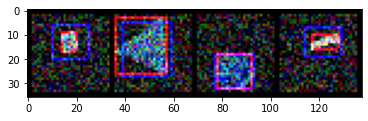



[i=50:] Ground Truth:      rectangle   triangle       disk       oval
[i=50:] Predicted Labels:  rectangle       disk       disk  rectangle
                    gt_bb:  [15,9,29,25]
                  pred_bb:  [13,5,30,25]
                    gt_bb:  [3,6,26,29]
                  pred_bb:  [9,10,24,25]
                    gt_bb:  [2,8,16,22]
                  pred_bb:  [0,5,18,23]
                    gt_bb:  [12,7,31,18]
                  pred_bb:  [11,6,29,19]


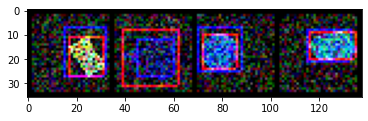



[i=100:] Ground Truth:      rectangle   triangle       disk       oval
[i=100:] Predicted Labels:       oval   triangle       disk   triangle
                    gt_bb:  [13,13,26,19]
                  pred_bb:  [11,9,26,22]
                    gt_bb:  [4,1,27,29]
                  pred_bb:  [0,0,30,31]
                    gt_bb:  [3,6,13,16]
                  pred_bb:  [4,5,16,17]
                    gt_bb:  [12,2,28,16]
                  pred_bb:  [8,1,28,20]


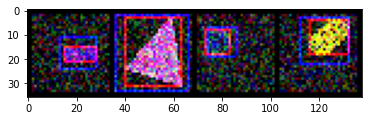



[i=150:] Ground Truth:      rectangle   triangle       disk       oval
[i=150:] Predicted Labels:       disk   triangle  rectangle       oval
                    gt_bb:  [4,0,31,25]
                  pred_bb:  [4,1,29,26]
                    gt_bb:  [3,2,30,26]
                  pred_bb:  [2,2,31,27]
                    gt_bb:  [10,6,20,16]
                  pred_bb:  [9,5,23,18]
                    gt_bb:  [10,0,14,9]
                  pred_bb:  [11,6,21,16]


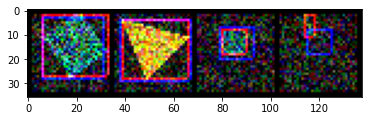



[i=200:] Ground Truth:      rectangle   triangle       disk       oval
[i=200:] Predicted Labels:       disk   triangle  rectangle       oval
                    gt_bb:  [12,10,18,16]
                  pred_bb:  [9,6,23,19]
                    gt_bb:  [2,0,28,20]
                  pred_bb:  [7,0,27,18]
                    gt_bb:  [14,5,31,23]
                  pred_bb:  [12,5,30,22]
                    gt_bb:  [16,3,31,16]
                  pred_bb:  [15,2,31,17]


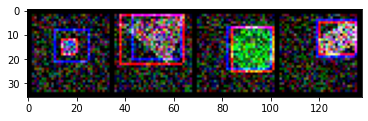



Prediction accuracy for rectangle : 47 %
Prediction accuracy for triangle : 72 %
Prediction accuracy for  disk : 69 %
Prediction accuracy for  oval : 28 %
Prediction accuracy for  star : 52 %



Overall accuracy of the network on the 1000 test images: 54 %


Displaying the confusion matrix:

                      rectangle       triangle           disk           oval           star

   rectangle:            47.00          12.00          15.50          16.00           9.50
    triangle:            10.00          72.50          13.00           0.50           4.00
        disk:            11.00           9.50          69.50           4.50           5.50
        oval:            46.00           5.00          14.00          28.50           6.50
        star:            21.00           7.50          13.50           5.50          52.50


In [0]:
%run -i ./Examples/noisy_object_detection_and_localization.py PurdueShapes5-10000-train-noise-50.gz PurdueShapes5-1000-test-noise-50.gz 1e-6 2




Looks like this is the first time you will be loading in
the dataset for this script. First time loading could take
a minute or so.  Any subsequent attempts will only take
a few seconds.






printing out the model:
LOADnet2(
  (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (skip64): SkipBlock(
    (convo): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (skip64ds): SkipBlock(
    (convo): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsampler): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2))
  )
  (skip64to128): SkipBlock(
    (convo): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn): BatchNorm2d(128, eps=1e-05, m

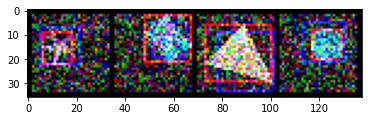



[epoch=1 iter=1000:] Ground Truth:           oval       oval       oval  rectangle
[epoch=1 iter=1000:] Predicted Labels:       oval       disk       disk   triangle
                    gt_bb:  [15,2,23,18]
                  pred_bb:  [8,4,22,18]
                    gt_bb:  [18,10,31,25]
                  pred_bb:  [12,10,26,23]
                    gt_bb:  [18,3,21,19]
                  pred_bb:  [7,5,21,20]
                    gt_bb:  [6,0,26,22]
                  pred_bb:  [3,0,27,23]

[epoch:1, iteration: 1000]  loss_labeling: 1.901  loss_regression: 16.737  


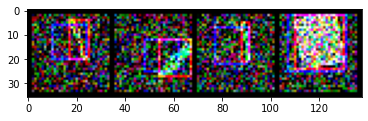



[epoch=1 iter=1500:] Ground Truth:           oval       oval       disk       star
[epoch=1 iter=1500:] Predicted Labels:       star  rectangle       disk       star
                    gt_bb:  [16,1,22,17]
                  pred_bb:  [10,6,24,19]
                    gt_bb:  [13,13,31,19]
                  pred_bb:  [13,9,31,25]
                    gt_bb:  [15,18,29,31]
                  pred_bb:  [12,15,26,27]
                    gt_bb:  [5,0,19,13]
                  pred_bb:  [7,3,20,16]

[epoch:1, iteration: 1500]  loss_labeling: 1.772  loss_regression: 15.311  


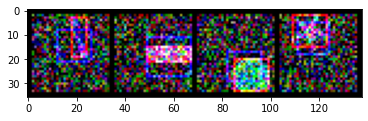



[epoch=1 iter=2000:] Ground Truth:      rectangle       star   triangle       disk
[epoch=1 iter=2000:] Predicted Labels:       disk       oval       star       oval
                    gt_bb:  [19,13,27,23]
                  pred_bb:  [12,8,22,19]
                    gt_bb:  [0,9,7,19]
                  pred_bb:  [10,10,17,18]
                    gt_bb:  [0,5,22,26]
                  pred_bb:  [1,2,18,21]
                    gt_bb:  [17,6,27,16]
                  pred_bb:  [12,5,24,17]

[epoch:1, iteration: 2000]  loss_labeling: 1.645  loss_regression: 15.103  


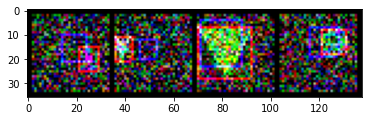



[epoch=1 iter=2500:] Ground Truth:       triangle   triangle   triangle       disk
[epoch=1 iter=2500:] Predicted Labels:   triangle       oval   triangle       star
                    gt_bb:  [0,1,31,23]
                  pred_bb:  [0,4,23,27]
                    gt_bb:  [9,1,29,21]
                  pred_bb:  [7,3,28,23]
                    gt_bb:  [1,3,23,25]
                  pred_bb:  [0,2,23,26]
                    gt_bb:  [1,3,13,15]
                  pred_bb:  [0,4,15,17]

[epoch:1, iteration: 2500]  loss_labeling: 1.675  loss_regression: 13.831  


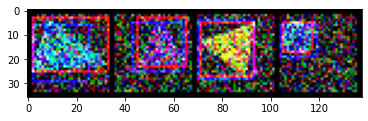



[epoch=2 iter=500:] Ground Truth:       triangle  rectangle   triangle       oval
[epoch=2 iter=500:] Predicted Labels:  rectangle   triangle       star       oval
                    gt_bb:  [3,7,31,28]
                  pred_bb:  [11,12,27,24]
                    gt_bb:  [4,0,29,24]
                  pred_bb:  [5,3,26,24]
                    gt_bb:  [0,4,23,25]
                  pred_bb:  [3,4,21,22]
                    gt_bb:  [9,1,14,10]
                  pred_bb:  [10,7,21,17]

[epoch:2, iteration:  500]  loss_labeling: 1.433  loss_regression: 12.678  


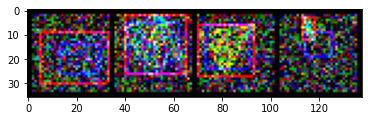



[epoch=2 iter=1000:] Ground Truth:           star  rectangle       oval  rectangle
[epoch=2 iter=1000:] Predicted Labels:       star       oval       star       oval
                    gt_bb:  [4,5,17,18]
                  pred_bb:  [1,2,16,16]
                    gt_bb:  [5,0,18,10]
                  pred_bb:  [8,0,18,11]
                    gt_bb:  [12,1,22,21]
                  pred_bb:  [6,0,23,19]
                    gt_bb:  [10,1,20,13]
                  pred_bb:  [9,2,19,11]

[epoch:2, iteration: 1000]  loss_labeling: 1.487  loss_regression: 10.669  


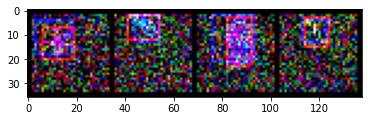



[epoch=2 iter=1500:] Ground Truth:           oval       disk   triangle   triangle
[epoch=2 iter=1500:] Predicted Labels:   triangle       disk   triangle       disk
                    gt_bb:  [14,10,30,22]
                  pred_bb:  [15,9,26,18]
                    gt_bb:  [8,1,30,23]
                  pred_bb:  [10,3,26,19]
                    gt_bb:  [4,3,29,24]
                  pred_bb:  [2,0,24,22]
                    gt_bb:  [4,7,31,30]
                  pred_bb:  [4,4,24,23]

[epoch:2, iteration: 1500]  loss_labeling: 1.416  loss_regression: 10.479  


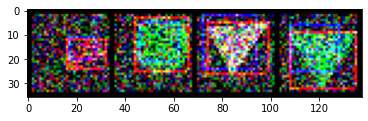



[epoch=2 iter=2000:] Ground Truth:           disk   triangle       star   triangle
[epoch=2 iter=2000:] Predicted Labels:  rectangle   triangle  rectangle   triangle
                    gt_bb:  [12,2,22,12]
                  pred_bb:  [10,2,21,12]
                    gt_bb:  [0,3,22,26]
                  pred_bb:  [3,4,24,24]
                    gt_bb:  [0,3,10,14]
                  pred_bb:  [8,6,16,11]
                    gt_bb:  [2,4,31,30]
                  pred_bb:  [7,5,30,24]

[epoch:2, iteration: 2000]  loss_labeling: 1.387  loss_regression: 10.122  


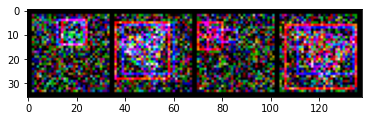



[epoch=2 iter=2500:] Ground Truth:       triangle       disk  rectangle  rectangle
[epoch=2 iter=2500:] Predicted Labels:   triangle       oval       star  rectangle
                    gt_bb:  [4,3,24,26]
                  pred_bb:  [2,0,26,28]
                    gt_bb:  [19,15,31,27]
                  pred_bb:  [16,12,27,23]
                    gt_bb:  [12,7,20,17]
                  pred_bb:  [8,6,21,18]
                    gt_bb:  [8,7,23,19]
                  pred_bb:  [7,5,25,22]

[epoch:2, iteration: 2500]  loss_labeling: 1.362  loss_regression: 9.336  


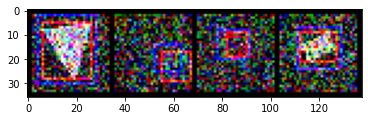


Finished Training



[i=0:] Ground Truth:      rectangle   triangle       disk       oval
[i=0:] Predicted Labels:       star   triangle       oval  rectangle
                    gt_bb:  [14,9,19,15]
                  pred_bb:  [11,9,21,18]
                    gt_bb:  [0,1,29,28]
                  pred_bb:  [1,9,26,31]
                    gt_bb:  [3,17,13,27]
                  pred_bb:  [7,12,18,23]
                    gt_bb:  [11,0,21,14]
                  pred_bb:  [8,2,21,15]


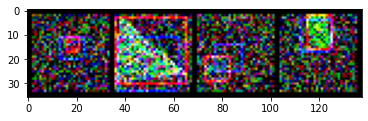



[i=50:] Ground Truth:      rectangle   triangle       disk       oval
[i=50:] Predicted Labels:       star       disk  rectangle       disk
                    gt_bb:  [5,1,13,10]
                  pred_bb:  [6,4,16,14]
                    gt_bb:  [7,2,29,31]
                  pred_bb:  [8,7,28,31]
                    gt_bb:  [8,1,26,19]
                  pred_bb:  [7,3,24,21]
                    gt_bb:  [13,11,25,15]
                  pred_bb:  [13,8,23,20]


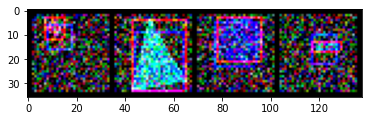



[i=100:] Ground Truth:      rectangle   triangle       disk       oval
[i=100:] Predicted Labels:       star   triangle       oval  rectangle
                    gt_bb:  [2,0,5,3]
                  pred_bb:  [8,10,17,19]
                    gt_bb:  [0,6,27,30]
                  pred_bb:  [3,6,28,31]
                    gt_bb:  [20,5,30,15]
                  pred_bb:  [17,7,29,16]
                    gt_bb:  [12,7,31,21]
                  pred_bb:  [11,7,28,22]


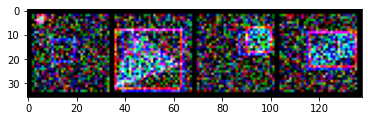



[i=150:] Ground Truth:      rectangle   triangle       disk       oval
[i=150:] Predicted Labels:       star   triangle       star       disk
                    gt_bb:  [4,3,9,9]
                  pred_bb:  [3,4,14,13]
                    gt_bb:  [3,1,31,27]
                  pred_bb:  [6,5,28,27]
                    gt_bb:  [1,4,13,16]
                  pred_bb:  [0,3,13,16]
                    gt_bb:  [18,11,31,22]
                  pred_bb:  [16,11,28,23]


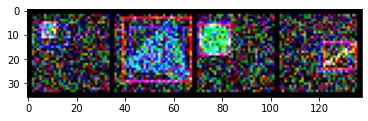



[i=200:] Ground Truth:      rectangle   triangle       disk       oval
[i=200:] Predicted Labels:  rectangle   triangle       disk  rectangle
                    gt_bb:  [7,3,13,10]
                  pred_bb:  [5,2,16,13]
                    gt_bb:  [7,2,31,27]
                  pred_bb:  [6,3,29,28]
                    gt_bb:  [14,8,31,26]
                  pred_bb:  [17,11,30,24]
                    gt_bb:  [5,0,25,21]
                  pred_bb:  [4,0,25,25]


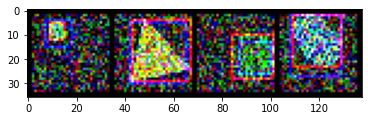



Prediction accuracy for rectangle : 46 %
Prediction accuracy for triangle : 65 %
Prediction accuracy for  disk : 45 %
Prediction accuracy for  oval : 24 %
Prediction accuracy for  star : 48 %



Overall accuracy of the network on the 1000 test images: 45 %


Displaying the confusion matrix:

                      rectangle       triangle           disk           oval           star

   rectangle:            46.00           4.50          11.00          21.00          17.50
    triangle:            16.50          65.00          12.50           3.00           3.00
        disk:            27.50           6.50          45.00          13.00           8.00
        oval:            50.50           4.00          14.00          24.50           7.00
        star:            23.00           4.00          15.00           9.50          48.50


In [0]:
%run -i ./Examples/noisy_object_detection_and_localization.py PurdueShapes5-10000-train-noise-80.gz PurdueShapes5-1000-test-noise-80.gz 1e-6 2

## (2) ------------------------------------ My Submission ------------------------------------------------------

## Dataset definiton

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision

import gzip, pickle

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
class PurdueShapes5Dataset(Dataset):
  img_size = 32
  root_dir = './gdrive/My Drive/ECE695_DL/HW5/data/'
  def __init__(self, noise_lvl, train=True, transform= None, smoothing= None):
    super().__init__()
    self.noise_lvl = noise_lvl # a string- 00,20,50,80
    self.transform = transform
    if train:
      self.dataset_name = 'PurdueShapes5-10000-train-noise-'+noise_lvl+'.gz'
    else:
      self.dataset_name = 'PurdueShapes5-1000-test-noise-'+noise_lvl+'.gz'

    # smoothing is a dictionary {'kernel size':kernel_size, 'sigma':sigma}
    if smoothing is not None: 
      self.kernel = PurdueShapes5Dataset._smoothing_kernel(smoothing)
    else:
      self.kernel = None

    if os.path.exists('torch_saved_'+ self.dataset_name+'_data.pt'):
      self.dataset = torch.load('torch_saved_'+ self.dataset_name+'_data.pt')
      self.label_map = torch.load('torch_saved_'+ self.dataset_name+'_label_map.pt')
      # reverse the key-value pairs in the label dictionary:
      self.class_labels = dict(map(reversed, self.label_map.items()))
    else:
      print('Loading data for first time, this might take some time')
      f = gzip.open(self.root_dir + self.dataset_name, 'rb')
      dataset = f.read()
      if sys.version_info[0] == 3:
        self.dataset, self.label_map = pickle.loads(dataset, encoding='latin1')
      else:
        self.dataset, self.label_map = pickle.loads(dataset)
      torch.save(self.dataset, 'torch_saved_'+ self.dataset_name+'_data.pt')
      torch.save(self.label_map,'torch_saved_'+ self.dataset_name+'_label_map.pt')
      # reverse the key-value pairs in the label dictionary:
      self.class_labels = dict(map(reversed, self.label_map.items()))

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self,idx):
    r = np.array( self.dataset[idx][0] )/255.
    g = np.array( self.dataset[idx][1] )/255.
    b = np.array( self.dataset[idx][2] )/255.
    R,G,B = r.reshape(self.img_size,self.img_size), g.reshape(self.img_size,self.img_size), b.reshape(self.img_size,self.img_size)
    if self.kernel is not None:
      R = np.clip(signal.convolve2d(R, self.kernel, mode= 'same'),0.,1.)
      G = np.clip(signal.convolve2d(G, self.kernel, mode= 'same'),0.,1.)
      B = np.clip(signal.convolve2d(B, self.kernel, mode = 'same'),0.,1.)
    im_tensor = torch.zeros(3,self.img_size,self.img_size, dtype=torch.float32)
    im_tensor[0,:,:] = torch.from_numpy(R)
    im_tensor[1,:,:] = torch.from_numpy(G)
    im_tensor[2,:,:] = torch.from_numpy(B)
    if self.transform:
      im_tensor = self.transform(im_tensor)
    sample = {'image' : im_tensor, 
              'bbox'  : torch.tensor(self.dataset[idx][3], dtype = torch.float32),                          
              'label' : torch.tensor(self.dataset[idx][4]) }
    return sample
  
  @staticmethod
  def _smoothing_kernel(smoothing):
    kernel_size = smoothing['kernel size']
    sigma = smoothing['sigma']
    var = sigma**2
    mean = (kernel_size-1)//2
    x_pos = np.arange(kernel_size)
    kernel_x = np.tile(x_pos,(kernel_size,1)) -mean
    kernel_y = kernel_x.T
    kernel = np.stack((kernel_x,kernel_y)).transpose(1,2,0)
    kernel = np.power(np.linalg.norm(kernel,axis=2),2)
    kernel = (1./(2.*np.pi*var))*np.exp(-(1./2.*var)*kernel)
    kernel = kernel/np.sum(kernel)      
    return kernel

def shapes_dataloader(train_dataset, test_dataset, batch_size=4, num_workers=4):
  train_dataloader = DataLoader(train_dataset, batch_size= batch_size, shuffle = True, num_workers=num_workers)
  test_dataloader = DataLoader(test_dataset, batch_size= batch_size, num_workers=num_workers)
  return [train_dataloader, test_dataloader]

In [0]:
##test dataset
#smoothing_params= {'kernel size': 7, 'sigma':2}
#train_dataset = PurdueShapes5Dataset('PurdueShapes5-10000-train-noise-20.gz',smoothing = smoothing_params)
##noise_train_dataset = PurdueShapes5Dataset('PurdueShapes5-10000-train-noise-20.gz')
#
#l = len(train_dataset)
#for i in np.random.randint(0,l, 10):
#  a = train_dataset[i]
#  #b = noise_train_dataset[i]
#  plt.imshow(a['image'].numpy().transpose(1,2,0).astype(np.int))
#             #b['image'].numpy().transpose(1,2,0).astype(np.int))))

## Model definition

In [0]:
# LOADNet2
class SkipBlock(nn.Module):
    def __init__(self, in_ch, out_ch, downsample=False, skip_connections=True):
        super().__init__()
        self.downsample = downsample
        self.skip_connections = skip_connections
        self.in_ch = in_ch
        self.out_ch = out_ch
        self.convo = nn.Conv2d(in_ch, out_ch, 3, stride=1, padding=1)
        norm_layer = nn.BatchNorm2d
        self.bn = norm_layer(out_ch)
        if downsample:
            self.downsampler = nn.Conv2d(in_ch, out_ch, 1, stride=2)
    def forward(self, x):
        identity = x                                     
        out = self.convo(x)                              
        out = self.bn(out)                              
        out = torch.nn.functional.relu(out)
        if self.in_ch == self.out_ch:
            out = self.convo(out)                              
            out = self.bn(out)                              
            out = torch.nn.functional.relu(out)
        if self.downsample:
            out = self.downsampler(out)
            identity = self.downsampler(identity)
        if self.skip_connections:
            if self.in_ch == self.out_ch:
                out += identity                              
            else:
                out[:,:self.in_ch,:,:] += identity
                out[:,self.in_ch:,:,:] += identity
        return out

class LOADnet2(nn.Module):
  def __init__(self, skip_connections=True, depth=32):
      super().__init__()
      self.pool_count = 3
      self.depth = depth // 2
      self.conv = nn.Conv2d(3, 64, 3, padding=1)
      self.pool = nn.MaxPool2d(2, 2)
      self.skip64 = SkipBlock(64, 64,skip_connections=skip_connections)
      self.skip64ds = SkipBlock(64, 64,downsample=True, skip_connections=skip_connections)
      self.skip64to128 = SkipBlock(64, 128,skip_connections=skip_connections )
      self.skip128 = SkipBlock(128, 128, skip_connections=skip_connections)
      self.skip128ds = SkipBlock(128,128, downsample=True, skip_connections=skip_connections)
      self.fc1 =  nn.Linear(128 * (32 // 2**self.pool_count)**2, 1000)
      self.fc2 =  nn.Linear(1000, 5)
      ##  for regression
      self.conv_seqn = nn.Sequential(
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
          nn.ReLU(inplace=True),
          nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
          nn.ReLU(inplace=True)
      )
      self.fc_seqn = nn.Sequential(
          nn.Linear(16384, 1024),
          nn.ReLU(inplace=True),
          nn.Linear(1024, 512),
          nn.ReLU(inplace=True),
          nn.Linear(512, 4)
      )

  def forward(self, x):
      x = self.pool(F.relu(self.conv(x)))          
      ## The labeling section:
      x1 = x.clone()
      for _ in range(self.depth // 4):
          x1 = self.skip64(x1)                                               
      x1 = self.skip64ds(x1)
      for _ in range(self.depth // 4):
          x1 = self.skip64(x1)                                               
      x1 = self.skip64to128(x1)
      for _ in range(self.depth // 4):
          x1 = self.skip128(x1)                                               
      x1 = self.skip128ds(x1)                                               
      for _ in range(self.depth // 4):
          x1 = self.skip128(x1)                                               
      x1 = x1.view(-1, 128 * (32 // 2**self.pool_count)**2 )
      x1 = torch.nn.functional.relu(self.fc1(x1))
      x1 = self.fc2(x1)
      ## The Bounding Box regression:
      x2 = self.conv_seqn(x)
      x2 = self.conv_seqn(x2)
      # flatten
      x2 = x2.view(x.size(0), -1)
      x2 = self.fc_seqn(x2)
      return x1,x2

In [0]:
# test network
#smoothing_params= {'kernel size': 7, 'sigma':2}
#train_dataset = PurdueShapes5Dataset('PurdueShapes5-10000-train-noise-20.gz',smoothing = smoothing_params)
#noise_train_dataset = PurdueShapes5Dataset('PurdueShapes5-10000-train-noise-20.gz')
#net = ObjDetNet60()
#a = train_dataset[0]
#x1,x2 = net(a['image'].unsqueeze(0))
#plt.imshow(a['image'].numpy().transpose(1,2,0).astype(np.int))
#print(a['bbox'], a['label'], train_dataset.class_labels)
#print(x1,x2)

## IOU Loss definition

In [0]:
class IOU_Loss(nn.Module):
  def __init__(self, eps=1e-10):
    super().__init__()
    self.eps = eps

  def forward(self, pred_bbx, gt_bbx):
    B = gt_bbx.shape[0]
    intersect = _intersection(pred_bbx, gt_bbx)
    union = _union(pred_bbx, gt_bbx)- intersect #+ self.eps
    return (1 - (intersect/union)).sum()/B
  
def _union(pred_bbx, gt_bbx):
  return _area(pred_bbx) + _area(gt_bbx)
  
def _area(bbx):
  delta_x = bbx[:,2] -bbx[:,0]
  delta_y = bbx[:,3] -bbx[:,1]
  area = delta_x*delta_y
  return area

def _intersection(pred_bbx, gt_bbx):
  lower_right_xy = torch.min( pred_bbx[:,2:], gt_bbx[:,2:] )
  upper_left_xy = torch.max( pred_bbx[:,:2], gt_bbx[:,:2] )
  delta_xy = torch.clamp( lower_right_xy - upper_left_xy, min=0 )
  int_area = delta_xy[:,0]*delta_xy[:,1]
  return int_area

## test IOU
#a = [1.,1,3,3]
#b = [2.,2,4,4]
#c  = [5.,5.,7.,7.]
#pred_bbx = torch.tensor([a,a], requires_grad = True)
#gt_bbx= torch.Tensor([a,b])
#crit = IOU_Loss()
#loss = crit(pred_bbx, gt_bbx)
#loss.backward()
#print(pred_bbx.grad)
#loss

## Training and Testing definition

In [0]:
def run_code_for_training(net,train_dataloader, device, params, label_dict,save_name):
  lr = params['lr']
  momentum= params['momentum']
  num_epochs = params['num epochs']
  debug = params['debug']
  freq= params['freq']

  net.to(device)
  crit_CE = nn.CrossEntropyLoss()
  crit_bbx = nn.MSELoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=lr, momentum=momentum)
  epoch_loss_label=[]
  epoch_loss_bbx=[]
  for epoch in range(num_epochs):  
      print("\n")
      running_loss_label = 0.0
      running_epoch_loss_label=0.0
      running_loss_bbx = 0.0
      running_epoch_loss_bbx=0.0
      count = 0
      if epoch > 5:
        if avg_loss_label< 5.0:
          if debug: print('#### Using IOU Loss for bbox ###') 
          crit_bbx = IOU_Loss()
      else:
        if debug: print('Using MSELoss for bbox ') 
        crit_bbx = nn.MSELoss()
      for i, data in enumerate(train_dataloader):
          x, gt_label, gt_bbx = data['image'], data['label'], data['bbox']
          x, gt_label, gt_bbx = x.to(device), gt_label.to(device), gt_bbx.to(device)
          optimizer.zero_grad()
          # Make the predictions with the model:
          pred_label, pred_bbx = net(x)
          loss_label = crit_CE(pred_label, gt_label)
          loss_bbx = crit_bbx(pred_bbx, gt_bbx)
          loss_label.backward(retain_graph = True)
          loss_bbx.backward()
          optimizer.step()
          running_loss_label += loss_label.item()
          running_epoch_loss_label += loss_label.item()
          running_loss_bbx += loss_bbx.item()
          running_epoch_loss_bbx += loss_bbx.item()
          if (i+1)%freq == 0:    
              avg_loss_label = running_loss_label / float(freq)
              avg_loss_bbx = running_loss_bbx/float(freq)
              #print("[epoch:%d, batch:%5d] labeling loss: %.3f bbox loss: %.3f" % (epoch + 1, i + 1, avg_loss_label, avg_loss_bbx))
              running_loss_label = 0.0
              running_loss_bbx = 0.0
              if debug:
                print("[epoch:%d, batch:%5d] labeling loss: %.3f bbox loss: %.3f" % (epoch + 1, i + 1, avg_loss_label, avg_loss_bbx))
                # show gt and predicted bbx
                display_gt_and_pred(x, gt_label,gt_bbx, pred_label, pred_bbx, label_dict)
          count += x.shape[0]
      epoch_loss_label.append(running_epoch_loss_label/count)
      epoch_loss_bbx.append(running_epoch_loss_bbx/count)
      running_epoch_loss_label=0.0
      running_epoch_loss_bbx=0.0
  print("\nFinished Training\n")
  save_model(net, save_name)
  #return(epoch_loss_label, epoch_loss_bbx)

def display_gt_and_pred(x, gt_label,gt_bbx, pred_label, pred_bbx, label_dict):
  b,c,h,w = x.shape
  x_copy = x.detach().clone().cpu()  
  pred_bbx = pred_bbx.detach().clone()
  pred_bbx[pred_bbx<0] = 0
  pred_bbx[pred_bbx>31] = 31
  pred_bbx[torch.isnan(pred_bbx)] = 0
  _, pred_label = torch.max(pred_label.data,axis=1)
  # print labels
  print('#----------- debug prints----------------#')
  print('ground truth labels: \t' + ''.join('%10s'%label_dict[gt_label[ib].item()] for ib in range(b)))
  print('predicted labels: \t' + ''.join('%10s'%label_dict[pred_label[ib].item()] for ib in range(b)))
  for idx in range(b):
      i1 = int(gt_bbx[idx][1])
      i2 = int(gt_bbx[idx][3])
      j1 = int(gt_bbx[idx][0])
      j2 = int(gt_bbx[idx][2])
      k1 = int(pred_bbx[idx][1])
      k2 = int(pred_bbx[idx][3])
      l1 = int(pred_bbx[idx][0])
      l2 = int(pred_bbx[idx][2])
      print("                    gt_bb:  [%d,%d,%d,%d]"%(j1,i1,j2,i2))
      print("                  pred_bb:  [%d,%d,%d,%d]"%(l1,k1,l2,k2))
      x_copy[idx,0,i1:i2,j1] = 1.
      x_copy[idx,0,i1:i2,j2] = 1.
      x_copy[idx,0,i1,j1:j2] = 1.
      x_copy[idx,0,i2,j1:j2] = 1.
      x_copy[idx,2,k1:k2,l1] = 1.                      
      x_copy[idx,2,k1:k2,l2] = 1.
      x_copy[idx,2,k1,l1:l2] = 1.
      x_copy[idx,2,k2,l1:l2] = 1.
  img= torchvision.utils.make_grid(x_copy)#, normalize=True)
  img = img/2.0 + 0.5 
  npimg = img.numpy()
  plt.imshow(npimg.transpose(1, 2, 0))
  plt.show()
  print('#--------------------------------------#')

def run_code_for_testing(net, test_dataloader, device, label_dict, save_name, noise_lvl):
  save_dir = r'./gdrive/My Drive/ECE695_DL/HW5/saved_models/'
  net.load_state_dict(torch.load(save_dir+ save_name))
  accuracy_label=0
  accuracy_bbx = 0
  count=0
  num_class = len(label_dict)
  conf_mat = np.zeros((num_class,num_class))
  crit_bbx = IOU_Loss()
  with torch.set_grad_enabled(False):
    net.eval()
    net.to(device)  
    for i,data in enumerate(test_dataloader):
      x, gt_label, gt_bbx = data['image'], data['label'], data['bbox']
      x, gt_label, gt_bbx = x.to(device), gt_label.to(device), gt_bbx.to(device)
      pred_label, pred_bbx = net(x)
      accuracy_bbx += 1. - crit_bbx(pred_bbx, gt_bbx)
      _, pred_label = torch.max(pred_label,axis=1)
      for ib in range(pred_label.shape[0]): conf_mat[gt_label[ib].item(), pred_label[ib].item()] += 1.
      count += pred_label.shape[0]
  accuracy_label = np.sum(conf_mat[np.arange(num_class),np.arange(num_class)])/np.sum(conf_mat)
  accuracy_label = accuracy_label*100
  accuracy_bbx = (accuracy_bbx/count)*100
  # print stuff
  print('Dataset'+noise_lvl+' Classification Accuracy:\t %.2f%%'%(accuracy_label))
  print('Dataset'+noise_lvl+' IOU:\t %.2f%%\n'%(accuracy_bbx))
  print('Dataset'+noise_lvl+' Confusion Matrix:')
  print(conf_mat)
  ## percentages conf mat
  # print_conf_mat = ((((conf_mat.T)/np.sum(conf_mat,axis = 1)).T)*100).astype(np.int)
  # print('%10s'%(' '),end='')
  # for i in range(num_class): print('%10s'%(label_dict[i]),end='')
  # print('')
  # for i in range(num_class):
  #   print('%10s'%(label_dict[i]+':'),end='')
  #   for j in range(num_class): print('%10s'%(str(print_conf_mat[i,j])),end='')
  #   print('')
  # print("\nFinished Testing\n")
  ##return accuracy_label, accuracy_bbx, conf_mat

def save_model(model,name):
  save_dir = './gdrive/My Drive/ECE695_DL/HW5/saved_models/'  
  torch.save(model.state_dict(), save_dir + name)

## Tasks:



In [0]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

%matplotlib inline
transform = torchvision.transforms.Compose([torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

###(0) Task1: Original models

In [0]:
# 0% noise: 
noise_lvl ='00'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform)
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-4,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'_original.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'_original.pt', noise_lvl)

# 20% noise: 
noise_lvl ='20'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform)
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-4,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'_original.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'_original.pt', noise_lvl)

# 50% noise: 
noise_lvl ='50'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform)
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-6,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'_original.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'_original.pt', noise_lvl)

# 80% noise: 
noise_lvl ='80'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform)
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-6,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'_original.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'_original.pt', noise_lvl)






Finished Training

Dataset00 Classification Accuracy:	 87.20%
Dataset00 IOU:	 7.62%

Dataset00 Confusion Matrix:
[[140.   0.   8.  51.   1.]
 [  2. 198.   0.   0.   0.]
 [  0.   0. 200.   0.   0.]
 [ 54.   0.   2. 144.   0.]
 [  4.   1.   4.   1. 190.]]





Finished Training

Dataset20 Classification Accuracy:	 87.10%
Dataset20 IOU:	 5.31%

Dataset20 Confusion Matrix:
[[133.   6.   6.  40.  15.]
 [  1. 198.   1.   0.   0.]
 [  3.   3. 189.   0.   5.]
 [ 36.   2.   3. 158.   1.]
 [  2.   3.   2.   0. 193.]]





Finished Training

Dataset50 Classification Accuracy:	 50.30%
Dataset50 IOU:	 4.01%

Dataset50 Confusion Matrix:
[[ 51.  21.  24.  71.  33.]
 [ 11. 134.  23.   9.  23.]
 [ 23.  23. 103.  19.  32.]
 [ 76.   2.  20.  82.  20.]
 [ 11.  12.  28.  16. 133.]]





Finished Training

Dataset80 Classification Accuracy:	 43.00%
Dataset80 IOU:	 4.24%

Dataset80 Confusion Matrix:
[[ 34.  34.  27.  57.  48.]
 [  8. 146.  15.  15.  16.]
 [ 21.  22.  71.  45.  41.]
 [ 44.   8.  29.  75.

### (1) Task 2: Effect of smoothing on accuracy


In [0]:
# 0% noise: smoothing always reduced the accuracy -1% (91 -> 89.8)
smoothing_params= {'kernel size':3, 'sigma':0.3}
noise_lvl ='00'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform, smoothing=smoothing_params) 
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform, smoothing=smoothing_params) 
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-4,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'.pt', noise_lvl)






Finished Training

Dataset00 Classification Accuracy:	 89.80%
Dataset00 IOU:	 8.87%

Dataset00 Confusion Matrix:
[[131.   0.   1.  58.  10.]
 [  2. 196.   0.   2.   0.]
 [  0.   0. 200.   0.   0.]
 [ 26.   0.   1. 172.   1.]
 [  0.   0.   0.   1. 199.]]


In [0]:
#  20% noise: smoothing improved accuracy by 4% (83-> 87.1%) 
smoothing_params= {'kernel size': 5, 'sigma':1.2}
noise_lvl ='20'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform, smoothing=smoothing_params) 
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform, smoothing=smoothing_params) 
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-4,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'.pt', noise_lvl)






Finished Training

Dataset20 Classification Accuracy:	 87.10%
Dataset20 IOU:	 4.12%

Dataset20 Confusion Matrix:
[[ 89.   2.   8.  92.   9.]
 [  0. 197.   2.   1.   0.]
 [  0.   0. 200.   0.   0.]
 [  6.   0.   0. 193.   1.]
 [  2.   0.   4.   2. 192.]]


In [0]:
#  50% noise: smoothing improves accuracy by 3% (54 -> 57%) 
smoothing_params= {'kernel size': 5, 'sigma':0.4}
noise_lvl ='50'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform, smoothing=smoothing_params) 
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform, smoothing=smoothing_params) 
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-6,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'.pt', noise_lvl)






Finished Training

Dataset50 Classification Accuracy:	 57.30%
Dataset50 IOU:	 0.00%

Dataset50 Confusion Matrix:
[[ 52.  17.  29.  76.  26.]
 [  8. 154.  15.  10.  13.]
 [ 17.   6. 121.  30.  26.]
 [ 45.   3.  29.  99.  24.]
 [ 15.   4.  15.  19. 147.]]


In [0]:
#  80% noise: smoothing improved accuracy by 7% (45 -> 52%) 
smoothing_params= {'kernel size': 5, 'sigma':0.01}
noise_lvl ='80'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform, smoothing=smoothing_params) 
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform, smoothing=smoothing_params) 
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = LOADnet2()
train_params = {'lr':1e-6,
                'momentum': 0.9,
                'num epochs': 2,
                'debug': False,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'LOADnet'+noise_lvl+'.pt')
model = LOADnet2()
run_code_for_testing(model, test_dataloader, device, label_dict,'LOADnet'+noise_lvl+'.pt', noise_lvl)






Finished Training

Dataset80 Classification Accuracy:	 52.70%
Dataset80 IOU:	 0.00%

Dataset80 Confusion Matrix:
[[ 49.   7.  22.  86.  36.]
 [ 12. 134.  31.  14.   9.]
 [ 21.  12. 100.  39.  28.]
 [ 39.   5.   5. 121.  30.]
 [ 17.  12.  13.  35. 123.]]


### (2) Task 3: Training a Noise Classifier to improve classification accuracy


In [0]:
# new dataset to import all noise level images
class All_PurdueShapes5_Dataset(Dataset):
  img_size = 32
  root_dir = './gdrive/My Drive/ECE695_DL/HW5/data/'
  noise_lvls = ['00','20','50','80']
  def __init__(self, train=True, transform= None):
    super().__init__()
    self.train = train
    self.transform = transform
    self.noise_lvls = self.noise_lvls # a string- 00,20,50,80
    self.dataset, self.label_maps, self.class_labels = load_shape_data(self.root_dir, self.noise_lvls, self.train)
    self.dataset_lens = [len(dataset) for dataset in self.dataset]

  def __len__(self):
    return np.sum(self.dataset_lens)

  def __getitem__(self,global_idx):
    # compute which dataset the idx corresponds to
    cum_sum = np.cumsum(self.dataset_lens)
    class_idx = np.nonzero(global_idx < cum_sum )[0][0]
    cum_sum = list(cum_sum)
    cum_sum.reverse()
    cum_sum.append(0)
    cum_sum.reverse()
    idx = global_idx - cum_sum[class_idx]
    dataset_idx = self.dataset[class_idx][idx]

    r = np.array( dataset_idx[0] )/255.
    g = np.array( dataset_idx[1] )/255.
    b = np.array( dataset_idx[2] )/255.
    R,G,B = r.reshape(self.img_size,self.img_size), g.reshape(self.img_size,self.img_size), b.reshape(self.img_size,self.img_size)
    im_tensor = torch.zeros(3,self.img_size,self.img_size, dtype=torch.float32)
    im_tensor[0,:,:] = torch.from_numpy(R)
    im_tensor[1,:,:] = torch.from_numpy(G)
    im_tensor[2,:,:] = torch.from_numpy(B)
    if self.transform:
      im_tensor = self.transform(im_tensor)
    sample = {'image' : im_tensor, 
              'bbox'  : torch.tensor(dataset_idx[3], dtype = torch.float32),                          
              'label' : torch.tensor(dataset_idx[4]), 
              'noise' : torch.tensor(class_idx)}
    return sample

#helping function
def load_shape_data(root_dir, noise_lvls, train):
  all_dataset = []
  all_label_maps =[]
  all_class_labels = []
  for noise_lvl in noise_lvls:    
    if train:
        dataset_name = 'PurdueShapes5-10000-train-noise-'+noise_lvl+'.gz'
    else:
        dataset_name = 'PurdueShapes5-1000-test-noise-'+noise_lvl+'.gz'
    
    if os.path.exists('torch_saved_'+ dataset_name+'_data.pt'):
      dataset = torch.load('torch_saved_'+ dataset_name+'_data.pt')
      label_map = torch.load('torch_saved_'+ dataset_name+'_label_map.pt')
      # reverse the key-value pairs in the label dictionary:
      class_labels = dict(map(reversed, label_map.items()))
    else:
      print('Loading data for first time, this might take some time')
      f = gzip.open(root_dir + dataset_name, 'rb')
      dataset = f.read()
      if sys.version_info[0] == 3:
        dataset, label_map = pickle.loads(dataset, encoding='latin1')
      else:
        dataset, label_map = pickle.loads(dataset)
      torch.save(dataset, 'torch_saved_'+ dataset_name+'_data.pt')
      torch.save(label_map,'torch_saved_'+ dataset_name+'_label_map.pt')
      # reverse the key-value pairs in the label dictionary:
      class_labels = dict(map(reversed, label_map.items()))
    all_dataset.append(dataset)
    all_label_maps.append(label_map)
    all_class_labels.append(class_labels)
  return(all_dataset, all_label_maps, all_class_labels)                           

def all_shapes_dataloader(train_dataset, test_dataset, batch_size=4, num_workers=4):
  train_dataloader = DataLoader(train_dataset, batch_size= batch_size, shuffle = True, num_workers=num_workers)
  test_dataloader = DataLoader(test_dataset, batch_size= batch_size, num_workers=num_workers)
  return [train_dataloader, test_dataloader]

In [0]:
# noise classifier network: something shallow should work
# using network from hw2 
class Noise_Classifier(nn.Module):
  img_size = 32
  num_noise_lvls = 4
  out_features = 32
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, self.out_features, 3, padding=1)
    self.conv2 = nn.Conv2d(self.out_features, self.out_features, 3)
    self.input_size_of_denselayer =self.out_features*7*7 #1568
    self.fc1 = nn.Linear(self.input_size_of_denselayer, 1000)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc2 = nn.Linear(1000, self.num_noise_lvls)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x))) 
    x = x.view(-1, self.input_size_of_denselayer)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

def train_noise_classifier(net, train_data_loader, device, train_params, save_name):
  epochs = train_params['epochs']
  debug =  train_params['debug']

  net = net.to(device)
  criterion = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)
  for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_data_loader):
      inputs, labels = data['image'], data['noise']
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()
      if (i+1)% 2000 == 0:
        avg_loss = running_loss / 22000.0
        if debug: print("\n[epoch:%d, batch:%d] loss: %.2f" %(epoch + 1, i + 1,avg_loss ))
        running_loss = 0.0
  save_model(net,save_name)

def test_noise_classifier(net, test_data_loader, device, save_name):
  # load wts to net
  save_dir = r'./gdrive/My Drive/ECE695_DL/HW5/saved_models/'
  net.load_state_dict(torch.load(save_dir+ save_name))  
  confusion_matrix = np.zeros((4,4))
  with torch.set_grad_enabled(False):
    net.eval()
    net.to(device)  
    for i,data in enumerate(test_data_loader):
      x, y_true = data['image'], data['noise']
      x, y_true = x.to(device), y_true.to(device)
      y_pred = net(x)
      _, y_pred = torch.max(F.softmax(y_pred, dim=1), dim=1)
      for b in range(y_pred.shape[0]): confusion_matrix[y_true[b], y_pred[b]] += 1.
  accuracy = np.sum(confusion_matrix[np.arange(4), np.arange(4)])/np.sum(confusion_matrix)
  print('Noise Classification Accuracy: %0.2f%%'%(accuracy*100))
  print('Noise Confusion Matrix:')    
  print(confusion_matrix)

def save_model(model,name):
  save_dir = './gdrive/My Drive/ECE695_DL/HW5/saved_models/'  
  torch.save(model.state_dict(), save_dir + name)

In [0]:
#training the noise classifier
noise_net = Noise_Classifier()
transform = torchvision.transforms.Compose([torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = All_PurdueShapes5_Dataset(transform=transform)
test_dataset = All_PurdueShapes5_Dataset(train=False, transform=transform)

train_dataloader, test_dataloader = all_shapes_dataloader(train_dataset, test_dataset, batch_size = 16, num_workers=8)

train_params = {'epochs':10, 'debug': True}

train_noise_classifier(noise_net, train_dataloader, device, train_params, 'noise_net.pt')
test_noise_classifier(noise_net, test_dataloader, device, 'noise_net.pt')


[epoch:1, batch:2000] loss: 0.02

[epoch:2, batch:2000] loss: 0.00

[epoch:3, batch:2000] loss: 0.00

[epoch:4, batch:2000] loss: 0.00

[epoch:5, batch:2000] loss: 0.00

[epoch:6, batch:2000] loss: 0.00

[epoch:7, batch:2000] loss: 0.00

[epoch:8, batch:2000] loss: 0.00

[epoch:9, batch:2000] loss: 0.00

[epoch:10, batch:2000] loss: 0.00
Noise Classification Accuracy: 100.00%
Noise Confusion Matrix:
[[1000.    0.    0.    0.]
 [   0. 1000.    0.    0.]
 [   0.    0. 1000.    0.]
 [   0.    0.    0. 1000.]]


In [0]:
# inferencing on different noise level test datasets using trained noise classifier to decide which trained network to use 
def noise_classsifier_augmented_testing(noise_lvl, test_dataloader, device, label_dict, debug=True):
  #make a list of trained models
  save_dir = r'./gdrive/My Drive/ECE695_DL/HW5/saved_models/'
  noise_lvls = ['00','20','50','80']
  net_list = []
  for i_noise_lvl in noise_lvls:
    net = LOADnet2()
    save_name = 'LOADnet' + i_noise_lvl + '_original.pt'
    net.load_state_dict(torch.load(save_dir+ save_name))
    net_list.append(net)
  # load the trained noise nclassifier
  noise_net = Noise_Classifier()
  noise_net.load_state_dict(torch.load(save_dir+ 'noise_net.pt'))

  # carry out inference
  accuracy_label=0
  accuracy_bbx = 0
  count=0
  num_class = len(label_dict)
  conf_mat = np.zeros((num_class,num_class))
  crit_bbx = IOU_Loss()
  with torch.set_grad_enabled(False):
    #set rained networks to eval mode and send to device
    for net in net_list: 
      net.eval()
      net.to(device)
    noise_net.eval()
    noise_net.to(device)  
    # inference on samples
    for i,data in enumerate(test_dataloader):
      x, gt_label, gt_bbx = data['image'], data['label'], data['bbox']
      x, gt_label, gt_bbx = x.to(device), gt_label.to(device), gt_bbx.to(device)
      pred_noise_lvl = noise_net(x)
      _,pred_noise_lvl = torch.max(pred_noise_lvl, axis=1)
      if debug: print(pred_noise_lvl)
      batch_size = x.shape[0]
      pred_label = torch.zeros(batch_size, num_class, dtype = torch.float32)
      pred_bbx = torch.zeros_like(gt_bbx,dtype = torch.float32 )
      for ib in range(batch_size):
        inet = net_list[pred_noise_lvl[ib]]
        ipred_label, ipred_bbx = inet(x[ib,:,:,:].unsqueeze(0))
        pred_label[ib,:] = ipred_label
        pred_bbx[ib,:] = ipred_bbx
      accuracy_bbx += 1. - crit_bbx(pred_bbx, gt_bbx)
      _, pred_label = torch.max(pred_label,axis=1)
      for ib in range(pred_label.shape[0]): conf_mat[gt_label[ib].item(), pred_label[ib].item()] += 1.
      count += pred_label.shape[0]
  accuracy_label = np.sum(conf_mat[np.arange(num_class),np.arange(num_class)])/np.sum(conf_mat)
  accuracy_label = accuracy_label*100
  accuracy_bbx = (accuracy_bbx/count)*100
  # print stuff
  print('Dataset'+noise_lvl+' Classification Accuracy:\t %.2f%%'%(accuracy_label))
  print('Dataset'+noise_lvl+' IOU:\t %.2f%%\n'%(accuracy_bbx))
  print('Dataset'+noise_lvl+' Confusion Matrix:')
  print(conf_mat)

In [33]:
# noise: 0%
noise_lvl = '00'
transform = torchvision.transforms.Compose([torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = test_dataset.class_labels
test_dataloader = DataLoader(test_dataset, batch_size= 8, num_workers=4)
noise_classsifier_augmented_testing(noise_lvl, test_dataloader, device, label_dict, debug=False)

Dataset00 Classification Accuracy:	 82.30%
Dataset00 IOU:	 7.62%

Dataset00 Confusion Matrix:
[[160.   0.   3.  34.   3.]
 [  4. 196.   0.   0.   0.]
 [ 12.   2. 186.   0.   0.]
 [ 90.   0.   1. 109.   0.]
 [ 20.   2.   6.   0. 172.]]


In [36]:
# noise: 20%
noise_lvl ='20'
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = test_dataset.class_labels
test_dataloader = DataLoader(test_dataset, batch_size= 8, num_workers=4)
noise_classsifier_augmented_testing(noise_lvl, test_dataloader, device, label_dict,debug=False)

Dataset20 Classification Accuracy:	 65.20%
Dataset20 IOU:	 5.31%

Dataset20 Confusion Matrix:
[[141.  14.   0.  36.   9.]
 [  1. 198.   0.   1.   0.]
 [ 21. 121.  25.  23.  10.]
 [ 82.   3.   0. 112.   3.]
 [ 10.  14.   0.   0. 176.]]


In [38]:
# noise: 50%
noise_lvl ='50'
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = test_dataset.class_labels
test_dataloader = DataLoader(test_dataset, batch_size= 8, num_workers=4)
noise_classsifier_augmented_testing(noise_lvl, test_dataloader, device, label_dict, debug=False)

Dataset50 Classification Accuracy:	 40.70%
Dataset50 IOU:	 4.01%

Dataset50 Confusion Matrix:
[[ 80.  13.  20.  44.  43.]
 [ 28.  69.  47.   8.  48.]
 [ 33.  29.  67.  11.  60.]
 [109.   7.  12.  40.  32.]
 [ 18.  10.  15.   6. 151.]]


In [39]:
# noise: 80%
noise_lvl ='80'
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform)
label_dict = test_dataset.class_labels
test_dataloader = DataLoader(test_dataset, batch_size= 8, num_workers=4)
noise_classsifier_augmented_testing(noise_lvl, test_dataloader, device, label_dict, debug=False)

Dataset80 Classification Accuracy:	 33.80%
Dataset80 IOU:	 4.24%

Dataset80 Confusion Matrix:
[[51. 17. 19. 82. 31.]
 [33. 66. 31. 36. 34.]
 [33. 32. 53. 38. 44.]
 [60.  6. 22. 96. 16.]
 [44. 26. 30. 28. 72.]]


### (3) Task 4: Improving accuracy for images with noise levels of 50%

In [0]:
class BottleNeck_Block(nn.Module):
  """ 3-conv layer bottleneck block"""
  def __init__(self,in_channels,mid_channels,out_channels, downsample=False, skip_connections=True):
    super().__init__()
    self.in_channels = in_channels
    self.mid_channels = mid_channels
    self.out_channels = out_channels
    self.downsample = downsample
    self.skip_connections = skip_connections

    norm_layer = nn.BatchNorm2d
    self.bn_in = norm_layer(in_channels)
    self.bn_mid = norm_layer(mid_channels)
    self.bn_out = norm_layer(out_channels)    
    if downsample:
      self.conv1 = nn.Conv2d(in_channels, mid_channels, 1, stride=2)
      self.downsampler = nn.Conv2d(in_channels,in_channels, 1, stride=2)
    else:
      self.conv1 = nn.Conv2d(in_channels, mid_channels, 1)
    self.conv2 = nn.Conv2d(mid_channels,mid_channels,3,padding=1)
    self.conv3 = nn.Conv2d(mid_channels,out_channels, 1)    

  def forward(self,x):
    identity = x.clone()
    # first conv layer
    out = self.conv1(x)
    out = self.bn_mid(out)
    out = F.relu(out)
    # second conv layer
    out = self.conv2(out)
    out = self.bn_mid(out)
    out = F.relu(out)
    # third conv layer
    out = self.conv3(out)
    out = self.bn_out(out)
    out = F.relu(out)
    if self.downsample:
      identity = self.downsampler(identity)
      identity = self.bn_in(identity)      
    if self.skip_connections:
      if self.in_channels == self.out_channels:
          out += identity                              
      else:
        for num in range(self.out_channels//self.in_channels):
          out[:,num*self.in_channels:(num+1)*self.in_channels,:,:] += identity
    return(out)

class ObjDetNet(nn.Module):
  def __init__(self, config):
    super().__init__()
    self.config = config
    self.conv = nn.Conv2d(3,64,3,padding=1) 
    self.pool = nn.MaxPool2d(3,stride=2, padding=1)
    #classification  
    self.btlnck_blk_64_256 = BottleNeck_Block(64,64,256)
    self.btlnck_blk256 = ObjDetNet._make_module_list(BottleNeck_Block(256,64,256), self.config[0])
    self.btlnck_blk_256_512_ds = BottleNeck_Block(256,128,512,downsample=True)
    self.btlnck_blk512 = ObjDetNet._make_module_list(BottleNeck_Block(512,128,512), self.config[1])
    self.btlnck_blk_512_1024_ds = BottleNeck_Block(512,256,1024,downsample=True)
    self.btlnck_blk1024 = ObjDetNet._make_module_list(BottleNeck_Block(1024,256,1024), self.config[2])
    self.av_pool = nn.AvgPool2d(4,1)
    self.fc1 =  nn.Linear(1024, 256)
    self.fc2 = nn.Linear(256,5)
    # for bbx
    self.conv_seqn = ObjDetNet._make_module_list(nn.Sequential(
      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True),
      nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
      nn.ReLU(inplace=True)),2)
    self.fc_seqn = nn.Sequential(
      nn.Linear(16*16*64, 1024),
      nn.ReLU(inplace=True),
      nn.Linear(1024, 512),
      nn.ReLU(inplace=True)
      )
    self.fc3 = nn.Linear(512, 4)

  def forward(self,x):
    x = self.pool(F.relu(self.conv(x)))
    #labeling section
    x1 = self.btlnck_blk_64_256(x)    
    for btlnck_blk256 in self.btlnck_blk256:
      x1 = btlnck_blk256(x1)                                               
    x1 = self.btlnck_blk_256_512_ds(x1)
    for btlnck_blk512 in self.btlnck_blk512:
      x1 = btlnck_blk512(x1)                                               
    x1 = self.btlnck_blk_512_1024_ds(x1)
    for btlnck_blk1024 in self.btlnck_blk1024:
      x1 = btlnck_blk1024(x1)
    x1 = self.av_pool(x1)
    x1 = x1.view(-1, 1024)
    x1 = F.relu(self.fc1(x1))
    x1 = self.fc2(x1)
    # bbx prediction    
    x2 = self.conv_seqn[0](x)
    x2 = self.conv_seqn[1](x2)
    x2 = x2.view(x.size(0),-1)
    x2 = self.fc_seqn(x2)
    x2 = self.fc3(x2)
    return x1, x2

  @staticmethod
  def _make_module_list(module, rep):
    mod_list = nn.ModuleList()
    for _ in range(rep): mod_list.append(module) 
    return(mod_list)

class ObjDetNet30(ObjDetNet):
 config = np.array([2,2,2]) 
 def __init__(self):
   super().__init__(self.config)

class ObjDetNet60(ObjDetNet):
 config = np.array([4,8,4]) 
 def __init__(self):
   super().__init__(self.config)



Using MSELoss for bbox 
[epoch:1, batch: 1000] labeling loss: 1.542 bbox loss: 187.832
#----------- debug prints----------------#
ground truth labels: 	 rectangle rectangle      star  triangle      disk      oval      oval  triangle
predicted labels: 	  triangle      star      star  triangle      disk      oval      oval      oval
                    gt_bb:  [8,1,31,25]
                  pred_bb:  [8,5,24,20]
                    gt_bb:  [15,9,31,22]
                  pred_bb:  [8,4,23,19]
                    gt_bb:  [5,9,23,25]
                  pred_bb:  [8,5,24,20]
                    gt_bb:  [4,7,29,27]
                  pred_bb:  [9,5,25,22]
                    gt_bb:  [9,12,19,22]
                  pred_bb:  [8,5,24,21]
                    gt_bb:  [14,0,21,15]
                  pred_bb:  [8,5,23,20]
                    gt_bb:  [14,9,31,25]
                  pred_bb:  [8,5,24,21]
                    gt_bb:  [0,8,24,30]
                  pred_bb:  [7,4,22,19]


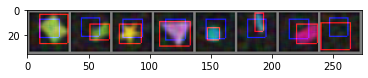

#--------------------------------------#


Using MSELoss for bbox 
[epoch:2, batch: 1000] labeling loss: 1.436 bbox loss: 24.872
#----------- debug prints----------------#
ground truth labels: 	      disk      disk      star  triangle rectangle rectangle  triangle      oval
predicted labels: 	      star      disk      star      oval      star      disk  triangle      oval
                    gt_bb:  [16,17,28,29]
                  pred_bb:  [11,10,26,25]
                    gt_bb:  [14,7,26,19]
                  pred_bb:  [12,4,28,20]
                    gt_bb:  [5,6,20,22]
                  pred_bb:  [3,5,19,20]
                    gt_bb:  [1,6,30,31]
                  pred_bb:  [10,9,25,24]
                    gt_bb:  [14,8,31,23]
                  pred_bb:  [12,9,28,24]
                    gt_bb:  [4,1,27,22]
                  pred_bb:  [5,1,23,19]
                    gt_bb:  [2,4,27,30]
                  pred_bb:  [10,7,31,28]
                    gt_bb:  [10,0,26,14]
              

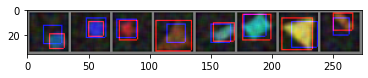

#--------------------------------------#


Using MSELoss for bbox 
[epoch:3, batch: 1000] labeling loss: 1.346 bbox loss: 11.933
#----------- debug prints----------------#
ground truth labels: 	      disk rectangle      star      disk      oval      disk  triangle      disk
predicted labels: 	      star  triangle      star      disk      oval      star  triangle      disk
                    gt_bb:  [8,9,18,19]
                  pred_bb:  [2,4,20,20]
                    gt_bb:  [0,0,22,20]
                  pred_bb:  [2,0,18,17]
                    gt_bb:  [4,0,17,11]
                  pred_bb:  [8,4,18,14]
                    gt_bb:  [10,11,30,31]
                  pred_bb:  [10,14,30,31]
                    gt_bb:  [16,0,26,17]
                  pred_bb:  [15,2,28,15]
                    gt_bb:  [22,15,31,25]
                  pred_bb:  [18,13,27,21]
                    gt_bb:  [8,0,31,27]
                  pred_bb:  [6,5,29,28]
                    gt_bb:  [9,10,23,24]
              

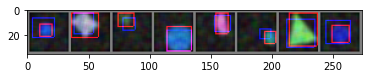

#--------------------------------------#


Using MSELoss for bbox 
[epoch:4, batch: 1000] labeling loss: 1.246 bbox loss: 7.958
#----------- debug prints----------------#
ground truth labels: 	 rectangle  triangle      oval rectangle      disk      oval  triangle  triangle
predicted labels: 	      star  triangle      disk  triangle      disk rectangle      star  triangle
                    gt_bb:  [22,19,30,27]
                  pred_bb:  [14,11,23,19]
                    gt_bb:  [4,6,23,29]
                  pred_bb:  [3,5,26,28]
                    gt_bb:  [8,0,28,19]
                  pred_bb:  [10,0,26,16]
                    gt_bb:  [3,0,29,25]
                  pred_bb:  [4,2,28,26]
                    gt_bb:  [18,5,30,17]
                  pred_bb:  [19,5,31,17]
                    gt_bb:  [14,8,31,24]
                  pred_bb:  [13,8,31,24]
                    gt_bb:  [1,4,22,31]
                  pred_bb:  [9,9,20,19]
                    gt_bb:  [6,7,30,29]
                 

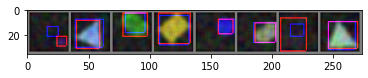

#--------------------------------------#


Using MSELoss for bbox 
[epoch:5, batch: 1000] labeling loss: 1.163 bbox loss: 5.515
#----------- debug prints----------------#
ground truth labels: 	      disk  triangle  triangle  triangle  triangle      oval rectangle      oval
predicted labels: 	      disk  triangle  triangle rectangle  triangle      star      star      oval
                    gt_bb:  [5,15,21,31]
                  pred_bb:  [4,15,21,31]
                    gt_bb:  [1,3,27,28]
                  pred_bb:  [0,1,29,29]
                    gt_bb:  [5,1,31,25]
                  pred_bb:  [4,2,30,27]
                    gt_bb:  [7,0,29,28]
                  pred_bb:  [3,0,30,28]
                    gt_bb:  [2,3,25,31]
                  pred_bb:  [0,5,27,31]
                    gt_bb:  [9,4,29,15]
                  pred_bb:  [10,2,26,16]
                    gt_bb:  [5,0,17,12]
                  pred_bb:  [5,0,17,11]
                    gt_bb:  [8,2,13,10]
                  pred_

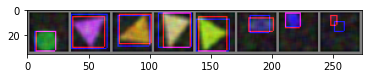

#--------------------------------------#


Using MSELoss for bbox 
[epoch:6, batch: 1000] labeling loss: 1.094 bbox loss: 4.423
#----------- debug prints----------------#
ground truth labels: 	  triangle  triangle  triangle  triangle      star  triangle rectangle rectangle
predicted labels: 	      star      star  triangle rectangle      star      disk      star      oval
                    gt_bb:  [2,3,25,31]
                  pred_bb:  [1,8,19,26]
                    gt_bb:  [2,3,29,25]
                  pred_bb:  [2,1,25,24]
                    gt_bb:  [2,4,29,27]
                  pred_bb:  [2,2,29,27]
                    gt_bb:  [1,3,31,25]
                  pred_bb:  [4,1,27,23]
                    gt_bb:  [4,2,17,14]
                  pred_bb:  [4,2,14,11]
                    gt_bb:  [2,3,28,24]
                  pred_bb:  [3,2,24,23]
                    gt_bb:  [9,8,16,13]
                  pred_bb:  [6,5,18,16]
                    gt_bb:  [17,13,31,24]
                  pred_b

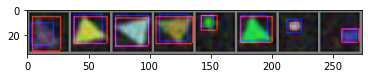

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:7, batch: 1000] labeling loss: 1.040 bbox loss: 0.304
#----------- debug prints----------------#
ground truth labels: 	      oval  triangle      oval      disk rectangle      star  triangle  triangle
predicted labels: 	 rectangle  triangle      oval      oval      oval      star  triangle      disk
                    gt_bb:  [15,4,31,22]
                  pred_bb:  [14,5,31,22]
                    gt_bb:  [7,3,31,27]
                  pred_bb:  [8,4,30,28]
                    gt_bb:  [21,15,31,25]
                  pred_bb:  [21,17,31,25]
                    gt_bb:  [18,4,30,16]
                  pred_bb:  [13,5,25,16]
                    gt_bb:  [13,8,26,19]
                  pred_bb:  [12,6,27,19]
                    gt_bb:  [6,5,20,18]
                  pred_bb:  [12,11,19,17]
                    gt_bb:  [4,1,29,30]
                  pred_bb:  [3,3,31,29]
                    gt_bb:  [0,7,23,28]
     

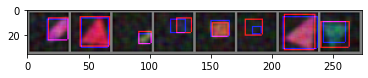

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:8, batch: 1000] labeling loss: 0.979 bbox loss: 0.301
#----------- debug prints----------------#
ground truth labels: 	      star  triangle  triangle      star rectangle      oval rectangle  triangle
predicted labels: 	      oval  triangle      disk      star      oval      oval      star      disk
                    gt_bb:  [8,5,24,20]
                  pred_bb:  [9,5,22,17]
                    gt_bb:  [1,2,21,25]
                  pred_bb:  [2,3,22,24]
                    gt_bb:  [8,2,31,29]
                  pred_bb:  [10,4,31,31]
                    gt_bb:  [6,9,26,28]
                  pred_bb:  [6,9,24,26]
                    gt_bb:  [17,15,31,18]
                  pred_bb:  [18,12,30,21]
                    gt_bb:  [16,2,20,18]
                  pred_bb:  [13,2,23,17]
                    gt_bb:  [2,2,17,17]
                  pred_bb:  [2,2,16,15]
                    gt_bb:  [3,2,31,27]
          

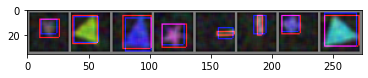

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:9, batch: 1000] labeling loss: 0.927 bbox loss: 0.300
#----------- debug prints----------------#
ground truth labels: 	  triangle      disk      disk      oval rectangle rectangle      oval  triangle
predicted labels: 	  triangle      disk      oval      oval rectangle      oval rectangle      disk
                    gt_bb:  [4,1,30,27]
                  pred_bb:  [5,0,29,26]
                    gt_bb:  [2,6,16,20]
                  pred_bb:  [1,5,16,20]
                    gt_bb:  [19,6,29,16]
                  pred_bb:  [17,5,30,15]
                    gt_bb:  [15,4,31,18]
                  pred_bb:  [15,6,31,18]
                    gt_bb:  [14,2,21,19]
                  pred_bb:  [12,1,22,18]
                    gt_bb:  [11,5,31,23]
                  pred_bb:  [10,7,31,22]
                    gt_bb:  [11,0,27,19]
                  pred_bb:  [11,0,25,17]
                    gt_bb:  [0,8,25,30]
       

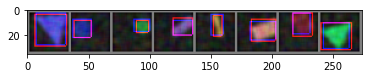

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:10, batch: 1000] labeling loss: 0.890 bbox loss: 0.297
#----------- debug prints----------------#
ground truth labels: 	 rectangle      disk      disk      star      oval rectangle      disk      star
predicted labels: 	 rectangle      disk      disk      star  triangle      oval      disk      star
                    gt_bb:  [15,11,29,27]
                  pred_bb:  [15,10,26,21]
                    gt_bb:  [8,5,26,23]
                  pred_bb:  [5,2,27,24]
                    gt_bb:  [13,22,23,31]
                  pred_bb:  [10,16,21,27]
                    gt_bb:  [3,2,21,20]
                  pred_bb:  [5,4,18,17]
                    gt_bb:  [6,4,28,20]
                  pred_bb:  [5,3,28,22]
                    gt_bb:  [13,3,27,19]
                  pred_bb:  [13,2,25,16]
                    gt_bb:  [11,3,27,19]
                  pred_bb:  [11,3,24,17]
                    gt_bb:  [2,9,17,22]
    

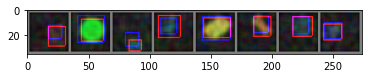

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:11, batch: 1000] labeling loss: 0.873 bbox loss: 0.299
#----------- debug prints----------------#
ground truth labels: 	 rectangle      oval rectangle  triangle      star  triangle      disk      star
predicted labels: 	      oval      oval      oval  triangle      star  triangle      disk      star
                    gt_bb:  [13,7,31,14]
                  pred_bb:  [12,6,29,15]
                    gt_bb:  [12,2,24,18]
                  pred_bb:  [11,1,24,18]
                    gt_bb:  [19,18,26,24]
                  pred_bb:  [15,11,26,23]
                    gt_bb:  [5,4,26,31]
                  pred_bb:  [3,3,25,28]
                    gt_bb:  [1,5,11,14]
                  pred_bb:  [10,9,19,17]
                    gt_bb:  [4,5,26,29]
                  pred_bb:  [3,4,25,26]
                    gt_bb:  [1,9,15,23]
                  pred_bb:  [0,6,16,23]
                    gt_bb:  [1,5,12,16]
       

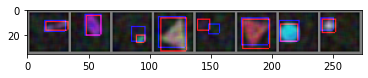

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:12, batch: 1000] labeling loss: 0.841 bbox loss: 0.296
#----------- debug prints----------------#
ground truth labels: 	 rectangle      star  triangle rectangle      oval      disk      star      disk
predicted labels: 	 rectangle      star  triangle rectangle      oval      disk      star      disk
                    gt_bb:  [14,11,26,19]
                  pred_bb:  [13,9,26,20]
                    gt_bb:  [1,1,13,14]
                  pred_bb:  [0,1,12,12]
                    gt_bb:  [8,4,30,28]
                  pred_bb:  [11,7,31,26]
                    gt_bb:  [9,1,29,21]
                  pred_bb:  [10,3,29,20]
                    gt_bb:  [10,0,18,15]
                  pred_bb:  [8,1,20,14]
                    gt_bb:  [14,13,28,27]
                  pred_bb:  [12,11,26,25]
                    gt_bb:  [1,8,11,18]
                  pred_bb:  [0,8,11,19]
                    gt_bb:  [20,12,31,24]
    

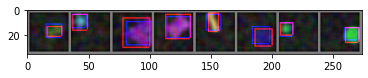

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:13, batch: 1000] labeling loss: 0.833 bbox loss: 0.295
#----------- debug prints----------------#
ground truth labels: 	 rectangle      disk      star      star      oval      star      oval      disk
predicted labels: 	  triangle      disk      star      star      oval      star      oval      disk
                    gt_bb:  [8,0,21,19]
                  pred_bb:  [7,1,23,19]
                    gt_bb:  [20,21,30,31]
                  pred_bb:  [17,19,27,29]
                    gt_bb:  [1,5,12,16]
                  pred_bb:  [0,4,11,15]
                    gt_bb:  [0,5,9,15]
                  pred_bb:  [1,4,13,15]
                    gt_bb:  [14,12,29,18]
                  pred_bb:  [16,10,29,19]
                    gt_bb:  [2,5,15,17]
                  pred_bb:  [1,4,14,16]
                    gt_bb:  [14,4,22,16]
                  pred_bb:  [12,2,23,16]
                    gt_bb:  [16,6,28,18]
      

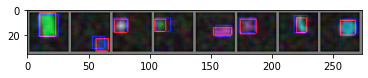

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:14, batch: 1000] labeling loss: 0.800 bbox loss: 0.293
#----------- debug prints----------------#
ground truth labels: 	      oval rectangle rectangle      star      disk      disk      star      oval
predicted labels: 	      oval rectangle rectangle      star      oval      disk      star      oval
                    gt_bb:  [11,0,23,17]
                  pred_bb:  [11,0,22,16]
                    gt_bb:  [17,12,29,21]
                  pred_bb:  [16,10,29,22]
                    gt_bb:  [15,0,31,15]
                  pred_bb:  [15,0,31,14]
                    gt_bb:  [3,12,20,27]
                  pred_bb:  [3,9,19,24]
                    gt_bb:  [14,10,31,28]
                  pred_bb:  [15,13,25,21]
                    gt_bb:  [3,18,17,31]
                  pred_bb:  [4,18,17,31]
                    gt_bb:  [6,0,21,12]
                  pred_bb:  [8,0,18,11]
                    gt_bb:  [21,20,31,22]

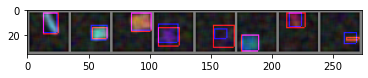

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:15, batch: 1000] labeling loss: 0.792 bbox loss: 0.295
#----------- debug prints----------------#
ground truth labels: 	  triangle      star rectangle rectangle      disk rectangle rectangle      star
predicted labels: 	  triangle      star      oval      star      disk      oval  triangle      star
                    gt_bb:  [8,5,29,31]
                  pred_bb:  [6,6,28,29]
                    gt_bb:  [0,12,15,27]
                  pred_bb:  [0,12,12,26]
                    gt_bb:  [8,0,18,12]
                  pred_bb:  [7,1,19,13]
                    gt_bb:  [8,6,14,11]
                  pred_bb:  [5,2,17,13]
                    gt_bb:  [5,16,15,26]
                  pred_bb:  [3,13,16,26]
                    gt_bb:  [13,0,27,19]
                  pred_bb:  [13,2,25,17]
                    gt_bb:  [7,5,26,24]
                  pred_bb:  [1,0,30,28]
                    gt_bb:  [5,0,18,10]
          

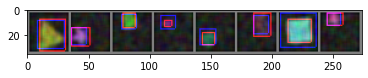

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:16, batch: 1000] labeling loss: 0.758 bbox loss: 0.292
#----------- debug prints----------------#
ground truth labels: 	 rectangle rectangle  triangle rectangle      oval      oval      oval      oval
predicted labels: 	      disk      oval  triangle      star rectangle      star      oval      oval
                    gt_bb:  [8,4,31,28]
                  pred_bb:  [7,4,30,27]
                    gt_bb:  [13,0,23,15]
                  pred_bb:  [13,0,23,15]
                    gt_bb:  [2,0,31,25]
                  pred_bb:  [3,1,27,25]
                    gt_bb:  [17,12,20,17]
                  pred_bb:  [15,9,24,19]
                    gt_bb:  [9,4,31,18]
                  pred_bb:  [10,4,29,18]
                    gt_bb:  [19,11,31,21]
                  pred_bb:  [13,9,22,16]
                    gt_bb:  [13,3,27,15]
                  pred_bb:  [11,3,25,15]
                    gt_bb:  [17,10,31,17]
   

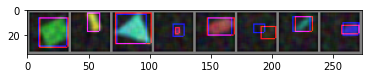

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:17, batch: 1000] labeling loss: 0.753 bbox loss: 0.292
#----------- debug prints----------------#
ground truth labels: 	 rectangle rectangle rectangle  triangle      disk      star      oval      star
predicted labels: 	      star rectangle      oval  triangle      disk      star      oval      star
                    gt_bb:  [5,0,12,8]
                  pred_bb:  [5,0,15,10]
                    gt_bb:  [19,14,31,24]
                  pred_bb:  [18,13,29,24]
                    gt_bb:  [14,0,19,16]
                  pred_bb:  [13,2,22,15]
                    gt_bb:  [2,1,29,31]
                  pred_bb:  [5,3,25,24]
                    gt_bb:  [18,1,28,11]
                  pred_bb:  [15,1,28,15]
                    gt_bb:  [6,2,20,17]
                  pred_bb:  [5,2,18,14]
                    gt_bb:  [17,8,31,24]
                  pred_bb:  [16,11,30,23]
                    gt_bb:  [7,5,21,17]
      

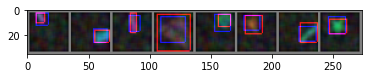

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:18, batch: 1000] labeling loss: 0.726 bbox loss: 0.291
#----------- debug prints----------------#
ground truth labels: 	  triangle rectangle      disk      disk  triangle  triangle      disk rectangle
predicted labels: 	  triangle  triangle      star      disk  triangle      star      disk      oval
                    gt_bb:  [1,3,28,30]
                  pred_bb:  [4,3,28,27]
                    gt_bb:  [5,2,31,30]
                  pred_bb:  [3,1,31,30]
                    gt_bb:  [9,14,19,24]
                  pred_bb:  [6,8,21,23]
                    gt_bb:  [10,9,28,27]
                  pred_bb:  [10,9,25,24]
                    gt_bb:  [3,0,29,30]
                  pred_bb:  [3,0,30,31]
                    gt_bb:  [0,2,24,22]
                  pred_bb:  [1,3,21,20]
                    gt_bb:  [16,17,28,29]
                  pred_bb:  [16,16,28,28]
                    gt_bb:  [9,4,16,13]
         

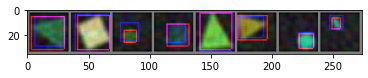

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:19, batch: 1000] labeling loss: 0.699 bbox loss: 0.292
#----------- debug prints----------------#
ground truth labels: 	  triangle  triangle  triangle rectangle      disk      star rectangle rectangle
predicted labels: 	  triangle  triangle  triangle      star      disk      star      oval      oval
                    gt_bb:  [0,5,28,27]
                  pred_bb:  [2,2,28,27]
                    gt_bb:  [2,3,26,28]
                  pred_bb:  [3,0,27,27]
                    gt_bb:  [2,0,29,27]
                  pred_bb:  [3,0,29,27]
                    gt_bb:  [9,7,24,22]
                  pred_bb:  [10,7,24,22]
                    gt_bb:  [1,10,13,22]
                  pred_bb:  [0,8,14,22]
                    gt_bb:  [3,0,13,7]
                  pred_bb:  [4,0,14,9]
                    gt_bb:  [15,4,28,18]
                  pred_bb:  [15,2,28,18]
                    gt_bb:  [14,3,31,20]
             

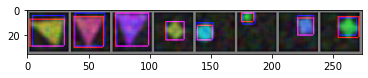

#--------------------------------------#


#### Using IOU Loss for bbox ###
[epoch:20, batch: 1000] labeling loss: 0.690 bbox loss: 0.290
#----------- debug prints----------------#
ground truth labels: 	      disk  triangle      star      star rectangle  triangle      star      disk
predicted labels: 	      disk  triangle      star      star      oval  triangle      star      disk
                    gt_bb:  [11,14,21,24]
                  pred_bb:  [8,11,23,25]
                    gt_bb:  [1,3,31,27]
                  pred_bb:  [2,1,31,28]
                    gt_bb:  [5,9,22,25]
                  pred_bb:  [6,9,23,24]
                    gt_bb:  [0,9,10,18]
                  pred_bb:  [0,8,9,18]
                    gt_bb:  [16,11,31,21]
                  pred_bb:  [16,11,31,21]
                    gt_bb:  [2,6,25,30]
                  pred_bb:  [1,4,25,29]
                    gt_bb:  [7,0,20,11]
                  pred_bb:  [7,0,17,11]
                    gt_bb:  [19,6,31,18]
         

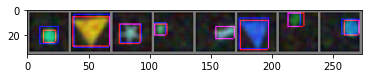

#--------------------------------------#

Finished Training



RuntimeError: ignored

In [0]:
# 50% noise:
smoothing_params= {'kernel size': 5, 'sigma':0.4} 
noise_lvl ='50'
train_dataset = PurdueShapes5Dataset(noise_lvl,transform= transform, smoothing=smoothing_params)
test_dataset = PurdueShapes5Dataset(noise_lvl,train=False,transform= transform, smoothing=smoothing_params)
label_dict = train_dataset.class_labels
train_dataloader, test_dataloader = shapes_dataloader(train_dataset, test_dataset, batch_size = 8)
net = ObjDetNet60()
train_params = {'lr':1e-5,
                'momentum': 0.8,
                'num epochs': 20,
                'debug': True,
                'freq':1000}

run_code_for_training(net, train_dataloader, device, train_params, label_dict, 'ObjDetNet60_noise'+noise_lvl+'.pt')

In [0]:
model = ObjDetNet60()
run_code_for_testing(model, test_dataloader, device, label_dict,'ObjDetNet60_noise'+noise_lvl+'.pt', noise_lvl)

Dataset50 Classification Accuracy:	 75.30%
Dataset50 IOU:	 8.89%

Dataset50 Confusion Matrix:
[[ 52.  10.  12.  99.  27.]
 [  8. 185.   7.   0.   0.]
 [  3.   2. 188.   5.   2.]
 [ 34.   0.   7. 152.   7.]
 [  6.   3.   4.  11. 176.]]
